In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
## Dropping User ID and Gender

df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


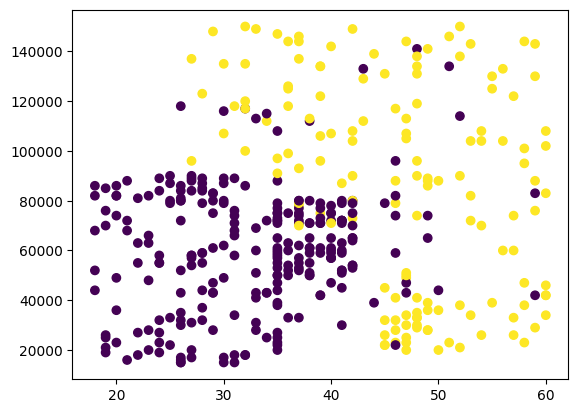

In [9]:
## Ploting Age VS Salary

plt.scatter(df.Age, df.EstimatedSalary, c = df.Purchased)

In [11]:
# Spliting the data

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [13]:
## Train_test_split

from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2, random_state =1)

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [16]:
# Building the Model wihtout Feature Scaling

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(1, activation = 'sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Epoch 1/100
10/10 [==============================] - 5s 26ms/step - loss: 2921.3760 - accuracy: 0.6531 - val_loss: 911.6025 - val_accuracy: 0.6000
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 595.9105 - accuracy: 0.4281 - val_loss: 408.4659 - val_accuracy: 0.4000
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 284.5966 - accuracy: 0.6031 - val_loss: 119.9145 - val_accuracy: 0.6000
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 121.6918 - accuracy: 0.4844 - val_loss: 44.8120 - val_accuracy: 0.6000
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 107.0286 - accuracy: 0.4844 - val_loss: 53.4542 - val_accuracy: 0.6000
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 148.8541 - accuracy: 0.4469 - val_loss: 232.0631 - val_accuracy: 0.6000
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 111.5854 - accuracy: 0.5031 - val_loss: 138.1605 - val_ac

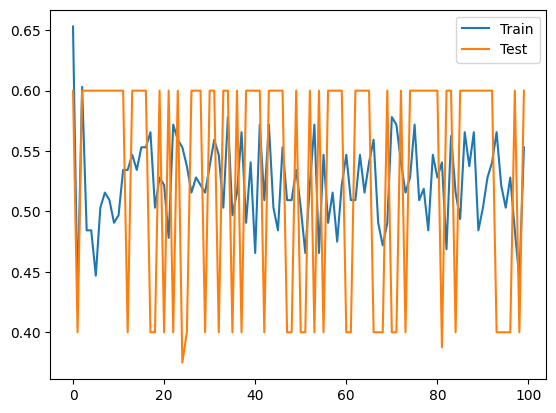

In [22]:
## Plotting Accuracy

plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
plt.legend()
plt.show()

In [23]:
## If we can see it accuracy is fluctuatiing for both train and test its osciallte between 40-60%

## Applying Featuring Scaling and Training the ANN MOdel

In [25]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train_sc = ss.fit_transform(x_train)
x_test_sc = ss.transform(x_test)

In [26]:
x_train_sc

array([[-0.80330081, -1.19121795],
       [ 0.75697997, -1.36859801],
       [ 0.85449752,  1.43991958],
       [-0.51074816, -1.48685138],
       [-1.48592365,  0.37563923],
       [-1.19337101,  0.55301929],
       [ 1.04953262, -1.04340124],
       [-0.21819552, -0.30431766],
       [ 0.95201507, -1.33903467],
       [-1.09585346, -1.07296458],
       [-0.51074816,  1.97205975],
       [ 2.21974321, -1.0138379 ],
       [ 1.43960282, -1.39816136],
       [ 0.07435713, -0.39300769],
       [-1.19337101,  0.64170932],
       [ 2.02470811, -0.89558452],
       [ 1.14705017,  0.58258263],
       [-0.02316042,  0.2869492 ],
       [-0.21819552,  0.25738586],
       [-0.31571307, -0.74776781],
       [-1.68095875, -0.57038775],
       [ 0.85449752,  0.58258263],
       [-0.60826571, -1.0138379 ],
       [ 0.95201507, -1.13209127],
       [-0.21819552, -0.54082441],
       [ 0.17187468,  0.81908937],
       [-0.41323061,  1.32166621],
       [ 1.14705017,  0.52345594],
       [ 0.75697997,

<Axes: >

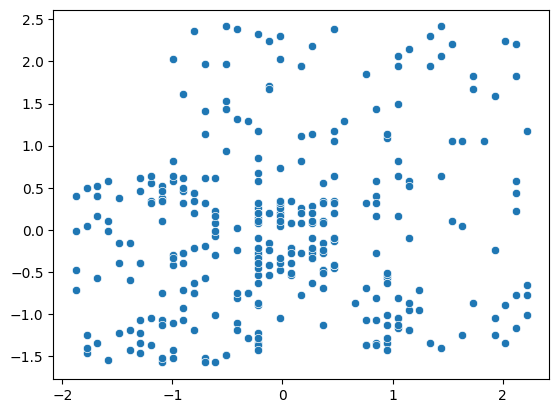

In [28]:
sns.scatterplot(x= x_train_sc[:,0], y= x_train_sc[:,1])

In [29]:
## If we absever the above graph there is only differnce of scale rest values are similar

In [31]:
## Building the model


model = Sequential()
model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit(x_train_sc, y_train, epochs=100, validation_data = (x_test_sc, y_test))

Epoch 1/100
10/10 [==============================] - 2s 43ms/step - loss: 0.7051 - accuracy: 0.3500 - val_loss: 0.6621 - val_accuracy: 0.4625
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: 0.6473 - accuracy: 0.6438 - val_loss: 0.6149 - val_accuracy: 0.8250
Epoch 3/100
10/10 [==============================] - 0s 14ms/step - loss: 0.5990 - accuracy: 0.8313 - val_loss: 0.5752 - val_accuracy: 0.8250
Epoch 4/100
10/10 [==============================] - 0s 11ms/step - loss: 0.5572 - accuracy: 0.8562 - val_loss: 0.5426 - val_accuracy: 0.8250
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.5210 - accuracy: 0.8656 - val_loss: 0.5151 - val_accuracy: 0.8375
Epoch 6/100
10/10 [==============================] - 0s 11ms/step - loss: 0.4889 - accuracy: 0.8687 - val_loss: 0.4912 - val_accuracy: 0.8500
Epoch 7/100
10/10 [==============================] - 0s 12ms/step - loss: 0.4604 - accuracy: 0.8625 - val_loss: 0.4700 - val_accuracy: 0.8375
Epoch 8

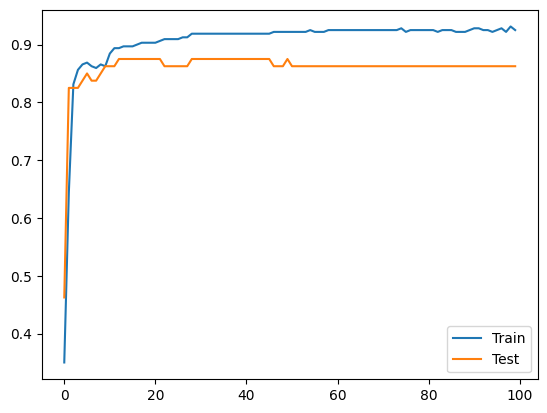

In [33]:
## PLotting the Accuracy

plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Test')
plt.legend()
plt.show()

In [ ]:
## And We can see the accuracy has been improved by doing feature scaling.